In [1]:
import numpy as np
import pandas as pd
data_df = pd.read_csv("auto-mpg.csv",header=0,engine='python')

In [2]:
print('데이터셋 크기:', data_df.shape)
data_df.head()

데이터셋 크기: (398, 9)


mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [3]:
data_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [4]:
data_df = data_df.drop(['car_name','origin','horsepower'], axis=1, inplace = False)
data_df.head()

mpg  cylinders  displacement  weight  acceleration  model_year
0  18.0          8         307.0    3504          12.0          70
1  15.0          8         350.0    3693          11.5          70
2  18.0          8         318.0    3436          11.0          70
3  16.0          8         304.0    3433          12.0          70
4  17.0          8         302.0    3449          10.5          70

In [5]:
print('데이터셋 크기:', data_df.shape)

데이터셋 크기: (398, 6)


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#X,Y 분할하기
Y=data_df['mpg']
X=data_df.drop(['mpg'],axis=1,inplace=False)

In [9]:
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
#선형회귀 분석 : 모델 생성
lr = LinearRegression()

In [11]:
#선형회귀 분석 : 모델 훈련
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [13]:
mse =  mean_squared_error(Y_test,Y_predict)
rmse = np.sqrt(mse)
print('MSE:{0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('R^2(Variancescore):{0:.3f}'.format(r2_score(Y_test,Y_predict)))

MSE:12.278,RMSE : 3.504
R^2(Variancescore):0.808


In [14]:
print('Y 절편 값:',np.round(lr.intercept_,2))
print('회귀 계수 값:',np.round(lr.coef_,2))

Y 절편 값: -17.55
회귀 계수 값: [-0.14  0.01 -0.01  0.2   0.76]


In [15]:
coef = pd.Series(data=np.round(lr.coef_,2),index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [16]:
lr.coef_

array([-0.13707609,  0.00748253, -0.00688522,  0.19807649,  0.7577852 ])

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

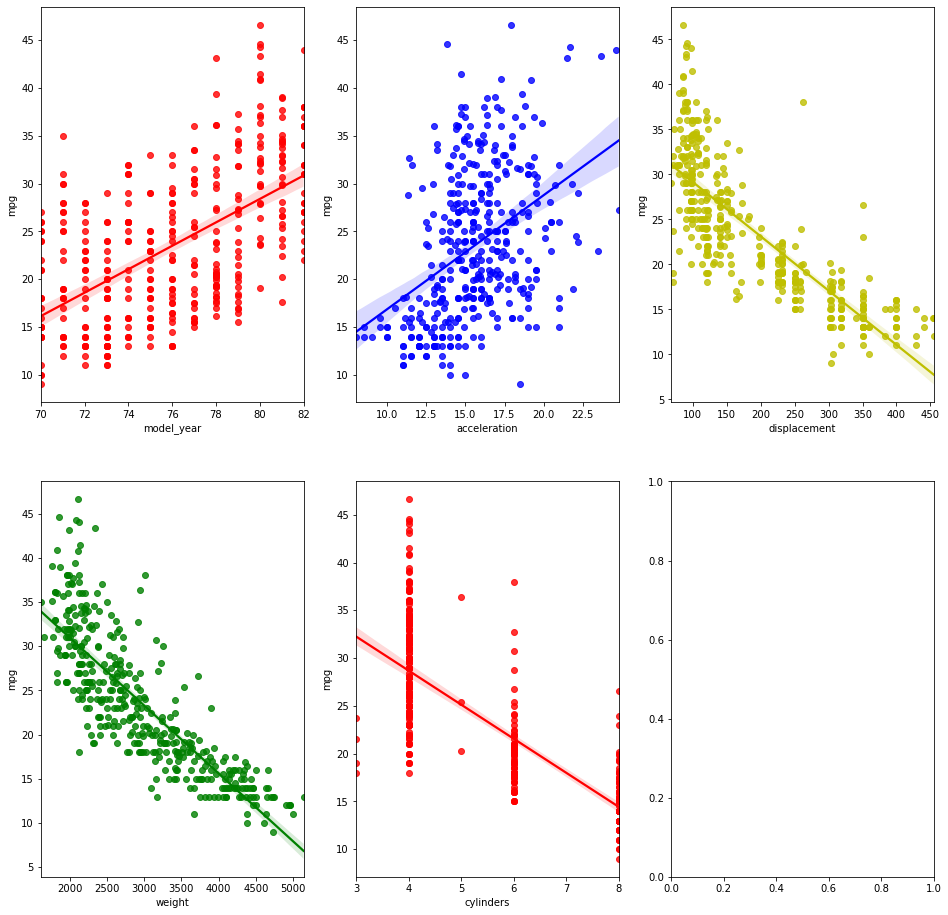

In [18]:
fig, axs = plt.subplots(figsize =(16,16),ncols=3,nrows=2)
x_features = ['model_year','acceleration','displacement',
             'weight','cylinders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row=int(i/3)
    col=i%3
    sns.regplot(x=feature,y='mpg',data=data_df,ax=axs[row][col],color=plot_color[i])

In [ ]:
data_df.corr(method = 'pearson')



In [20]:
data_df.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [22]:
print('연비를 예측하고 싶은 차의 정보를 입력해주세요.')
cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 5
displacement : 10
weight : 20
acceleration : 30
model_year : 1


In [23]:
mpg_predict = lr.predict([[cylinders_1,displacement_1,weight_1,acceleration_1,model_year_1]])

In [24]:
print("이 자동차의 예상 연비(MPG)는 %.2f입니다."%mpg_predict)

이 자동차의 예상 연비(MPG)는 -11.60입니다.


In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler

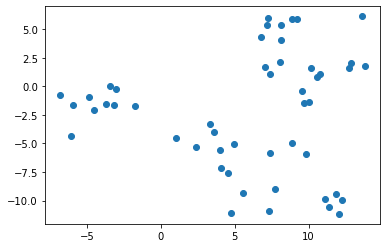

In [27]:
X, _= make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [28]:
X_train, X_test = train_test_split(X, test_size = 0.1,
                                                   random_state=5)

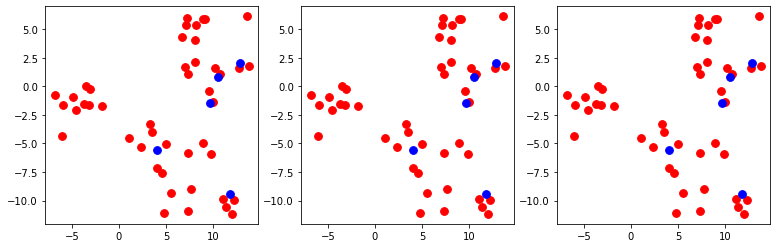

In [29]:
# 훈련 세트와 테스트 세트의 산점도를 그림
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:,0], X_train[:, 1],
               c='r',s=60)
axes[0].scatter(X_test[:,0], X_test[:, 1],
               c='b',s=60)

# MinMaxScaler를 사용해 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train[:,0], X_train[:, 1],
               c='r',s=60)
axes[1].scatter(X_test[:,0], X_test[:, 1],
               c='b',s=60)
# 테스트 세트의 스케일을 따로 조정
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# 잘못 조정된 데이터의 산점도를 그림
axes[2].scatter(X_train[:,0], X_train[:, 1],
               c='r',s=60)
axes[2].scatter(X_test[:,0], X_test[:, 1],
               c='b',s=60)

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6153846153846154

In [31]:
scalar = MinMaxScaler().fit(X_train)
X_train_s = scalar.transform(X_train)
X_test_s = scalar.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.9440559440559441

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train_s = scalar.transform(X_train)
X_test_s = scalar.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

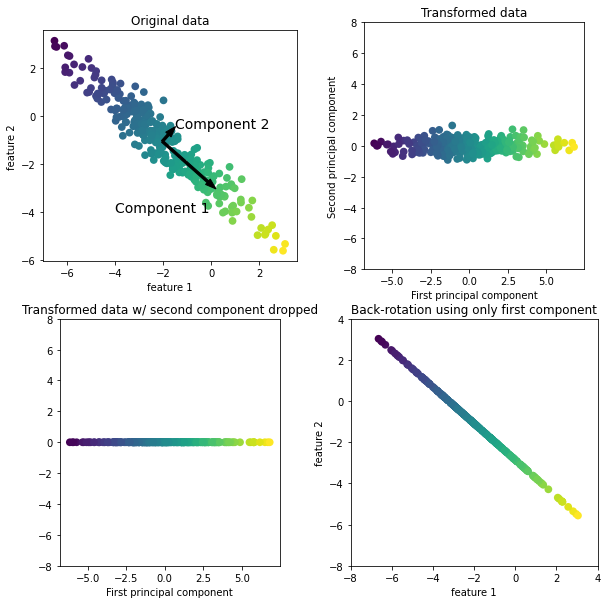

In [33]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [34]:
X_train_s

array([[ 0.30575375,  2.59521918,  0.46246107, ...,  1.81549702,
         2.10164609,  3.38609913],
       [ 0.23351721, -0.05334893,  0.20573083, ...,  0.5143837 ,
         0.14721854,  0.05182385],
       [ 0.15572401,  0.18345881,  0.11343692, ...,  0.69446859,
         0.263409  , -0.10011179],
       ...,
       [ 0.85586279,  1.19276558,  0.89773369, ...,  1.12967374,
         0.75591781,  2.97065009],
       [-0.02486734,  0.44095848, -0.08606303, ..., -0.52515632,
        -1.1291423 , -0.45561747],
       [-0.30270019, -0.20968802, -0.37543871, ..., -0.967865  ,
        -1.54361274, -1.31500348]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_s)

In [36]:
X_train_pca.shape

(426, 2)

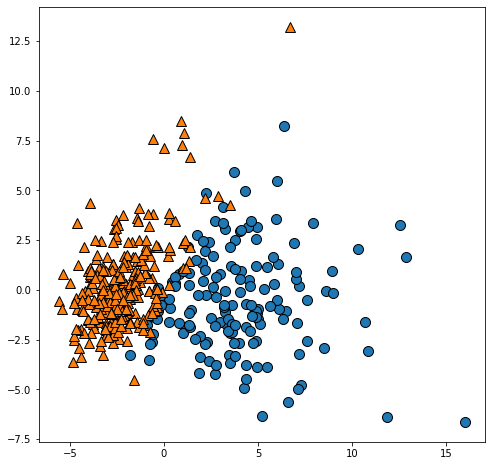

In [37]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)

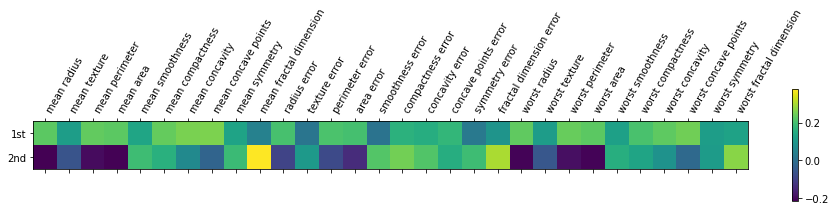

In [38]:
# 210pg
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['1st', '2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.show()

In [39]:
from sklearn.datasets import fetch_lfw_people

In [49]:
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

In [52]:
people.images.shape # 62명의 얼굴을 찍은 이미지 총 3023개 이미지 크기는 87X65픽셀

(3023, 87, 65)

In [57]:
#62명의 데이터셋
people.target_names.shape

(62,)

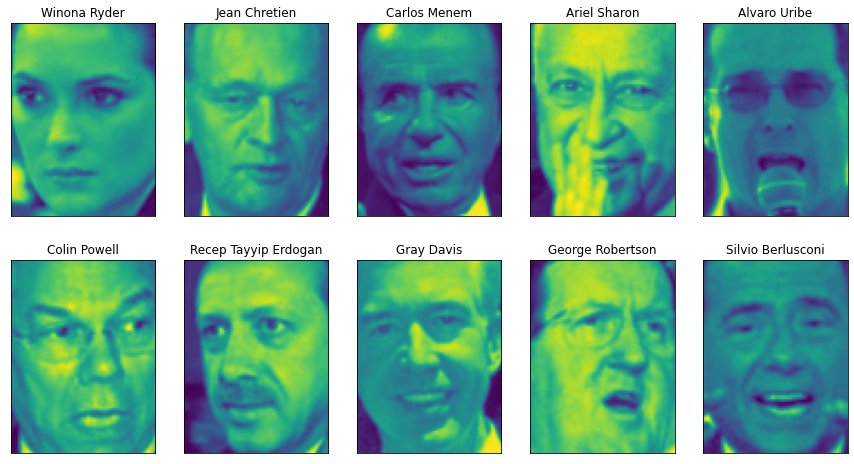

In [48]:
fig, axes = plt.subplots(2,5,figsize=(15,8),
                          subplot_kw={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [58]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name,count), end=' ')
    if(i+1)%3==0: print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [60]:
people.target.shape

(3023,)

In [61]:
mask = np.zeros(people.target.shape,dtype=np.bool)
mask

array([False, False, False, ..., False, False, False])

In [63]:
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

In [64]:
X_people.shape

(2063, 5655)

In [66]:
#rgb값은 0~255 가 존재한다. 그래서 255로 나눠서 0~1 스케일로 조정해준다.
X_people /= 255

In [67]:
print([X_people[0].min(),X_people[0].max()])
print([X_people[1].min(),X_people[0].max()])
print([X_people[2].min(),X_people[0].max()])

[0.045751635, 0.9607843]
[0.0052287583, 0.9607843]
[0.018300653, 0.9607843]


In [68]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people, stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.23255813953488372

In [69]:
knn2=KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.2131782945736434

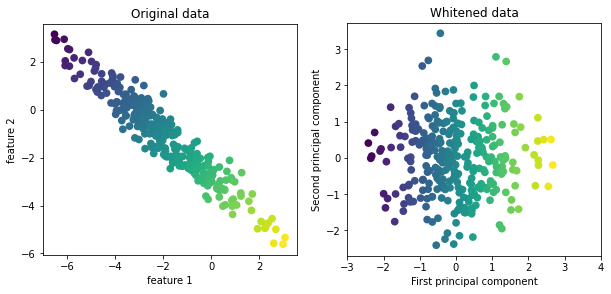

In [70]:
mglearn.plots.plot_pca_whitening()

In [71]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca,y_test)

0.312015503875969

In [73]:
pca = PCA(n_components=500,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca,y_test)

0.14147286821705427